In [38]:
import pandas as pd
df_ames = pd.read_csv("C:\\Users\\vpaidmarri\\Desktop\\DS\\1_1\\ames_train.csv")
df_ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
df_ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 1.a) List the columns which are not really relevant for the business.

In [40]:
# list of columns to remove
cols_to_remove = [
    "MSSubClass", "MSZoning", "Street", "LotShape",
    "LandContour", "Utilities", "LandSlope", "Neighborhood", "Condition2",
    "BldgType", "YearRemodAdd", "RoofStyle", "RoofMatl", "Exterior2nd",
    "BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
    "BsmtFinSF2", "BsmtUnfSF", "KitchenQual",
    "GarageFinish", "GarageArea", "GarageQual", "GarageCond",
    "MiscFeature", "MoSold"
]

#df_ames = df_ames.drop(columns=cols_to_remove)

### 1b. Define co-relation - Statistical evidence to elimiate the feautures

In [41]:
corr_matrix = df_ames.select_dtypes(include='number').corr(method='spearman')

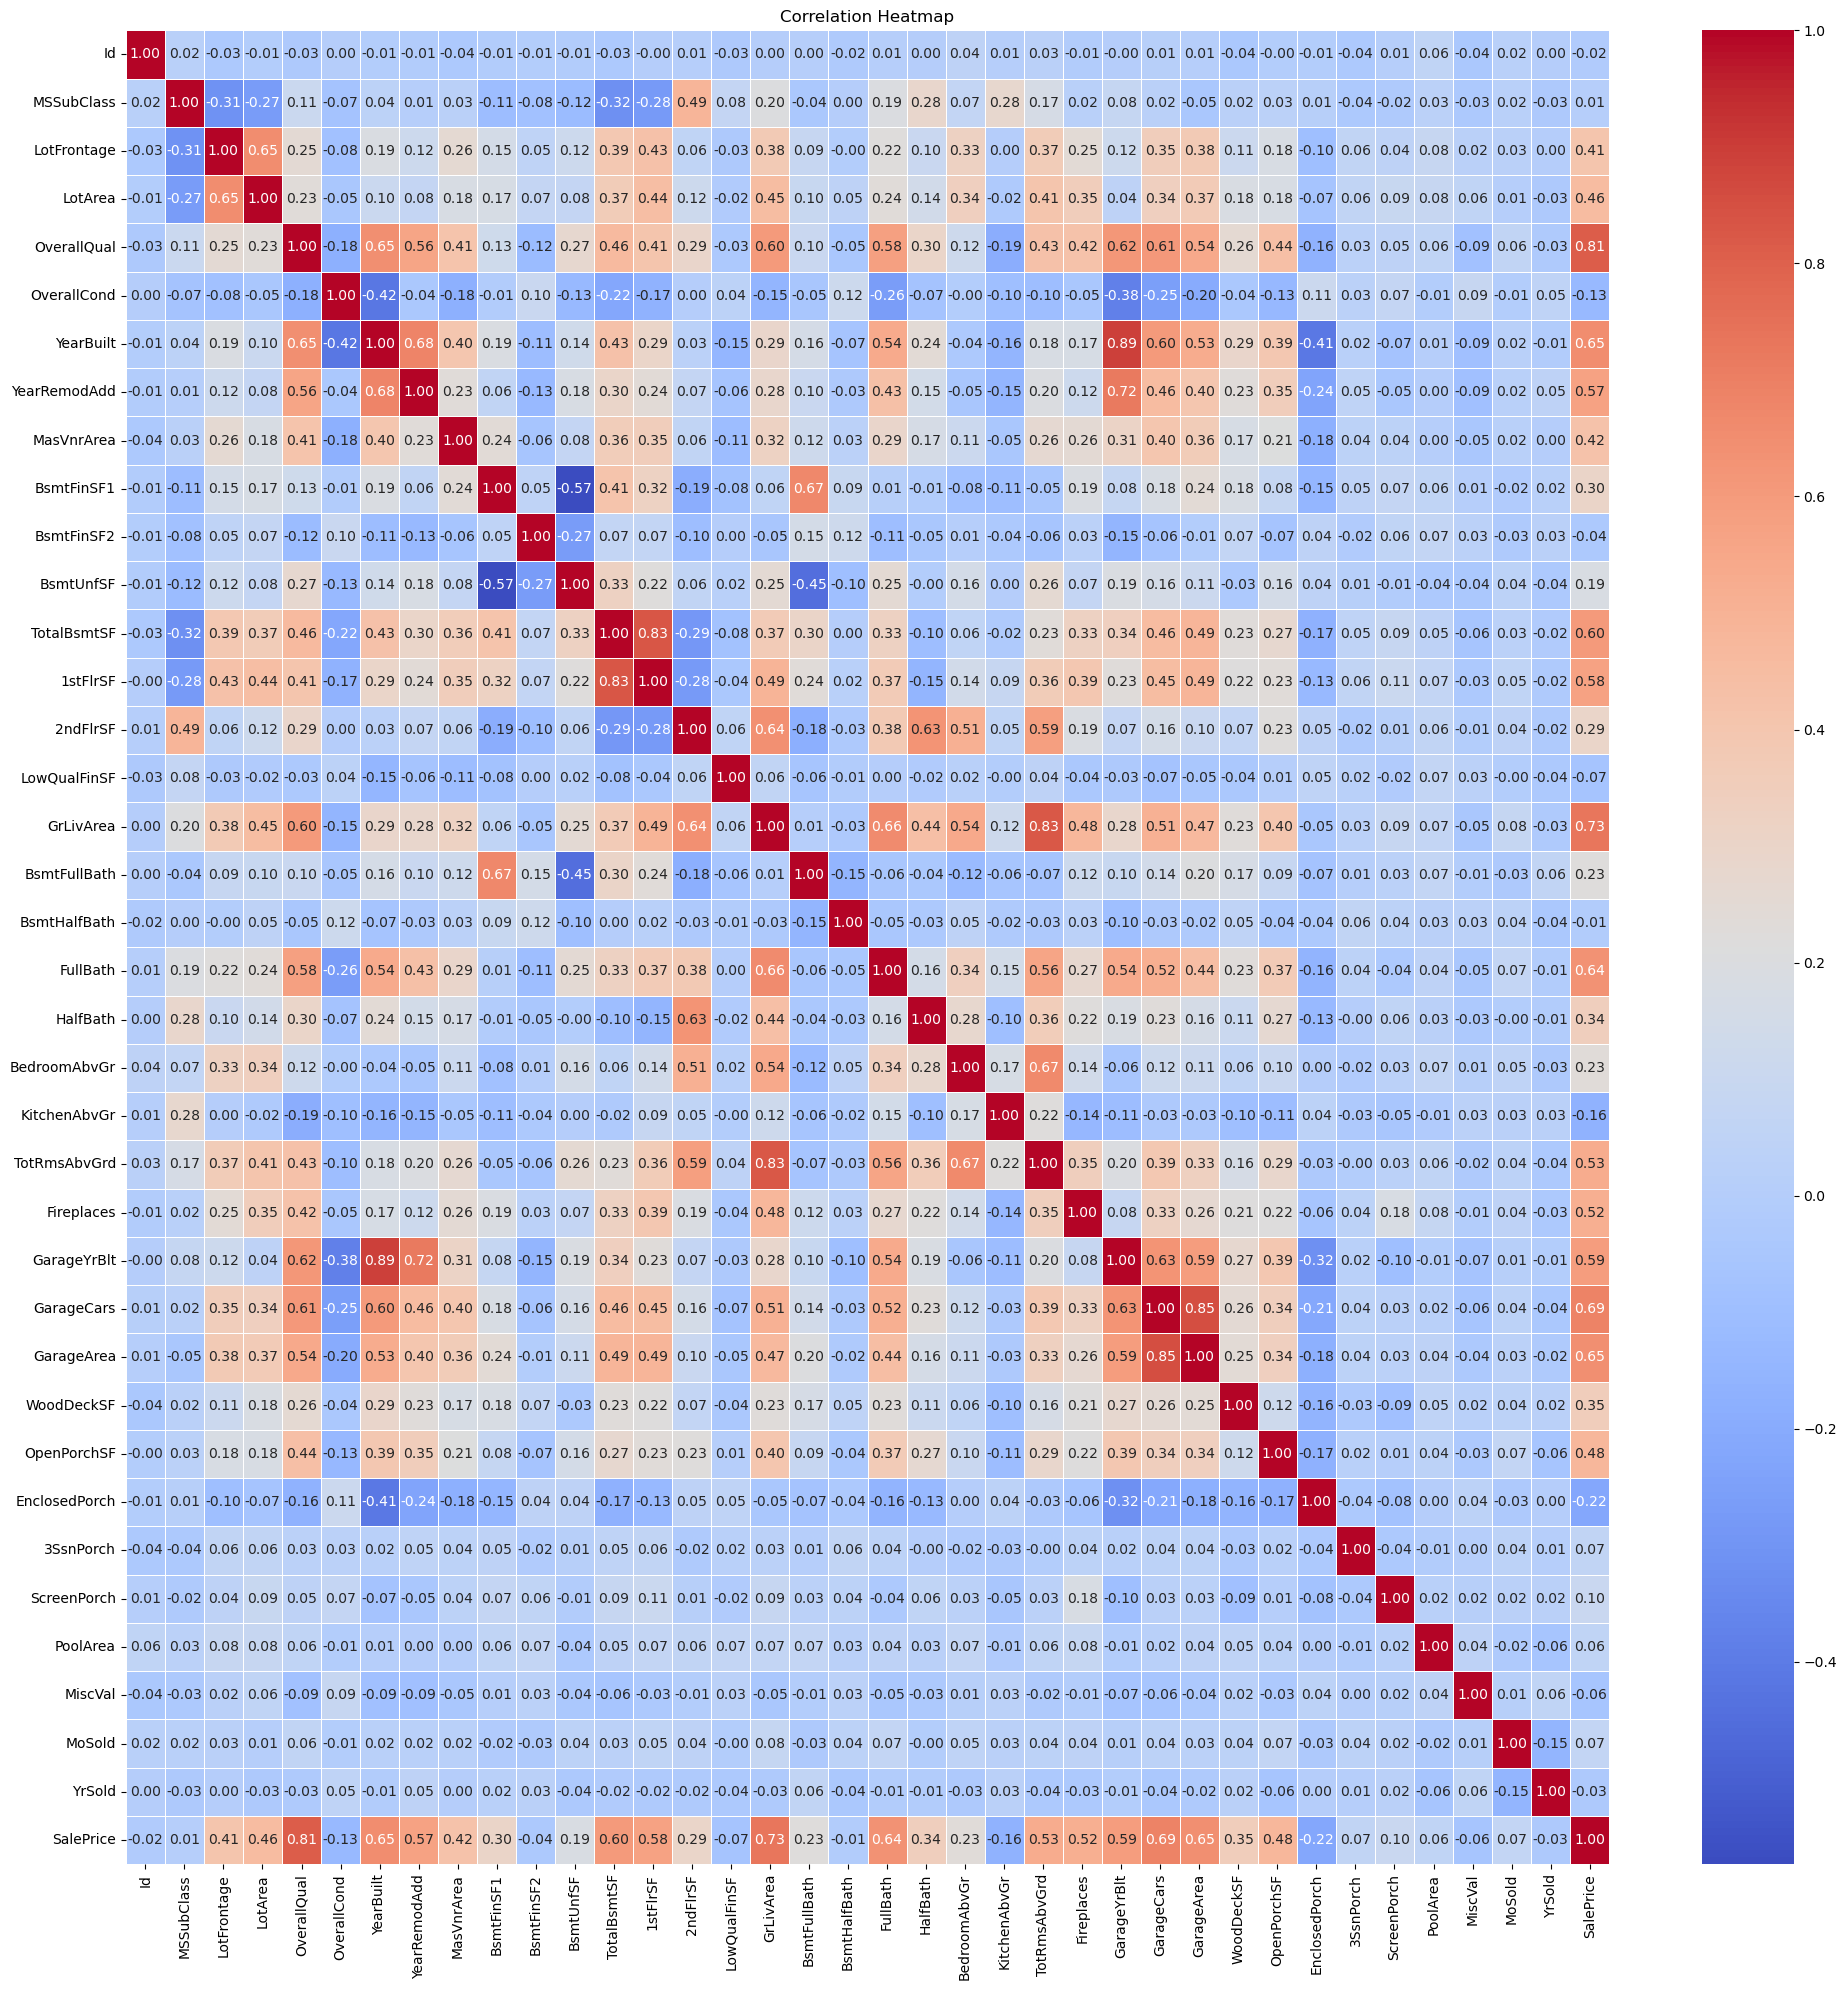

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Generate heatmap
sns.heatmap(
    corr_matrix,
    annot=True,        # Show correlation values
    cmap='coolwarm',   # Color map
    fmt=".2f",         # Format for numbers
    linewidths=0.5
)

# Add title
plt.title("Correlation Heatmap")

# Show plot
plt.tight_layout()
plt.show()

### 1b. Scatter Plot - numerical columns Statistical evidence to elimiate the feautures

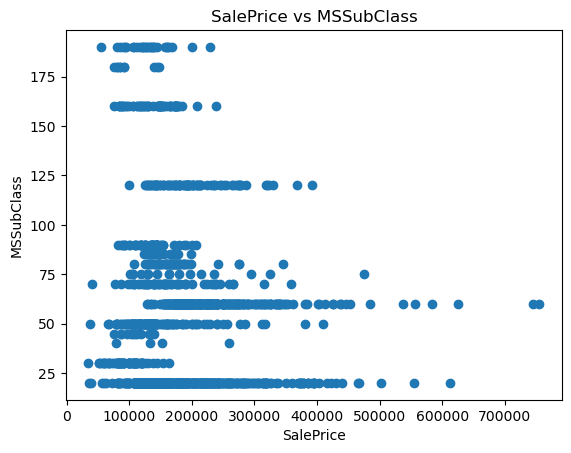

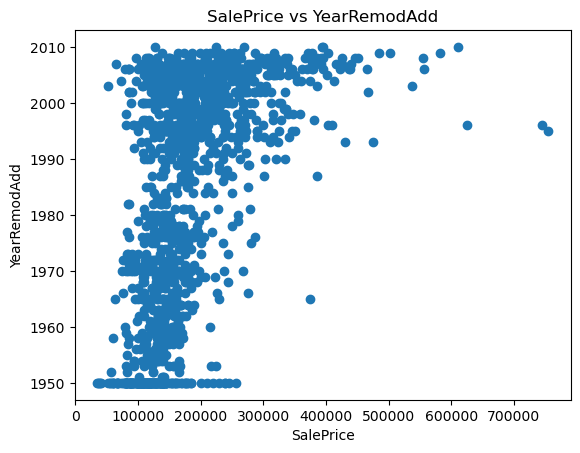

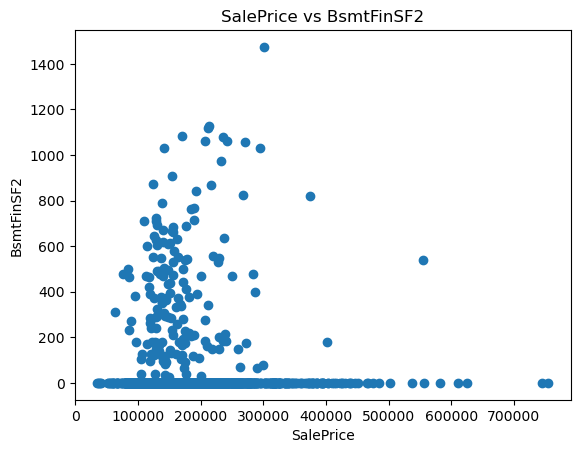

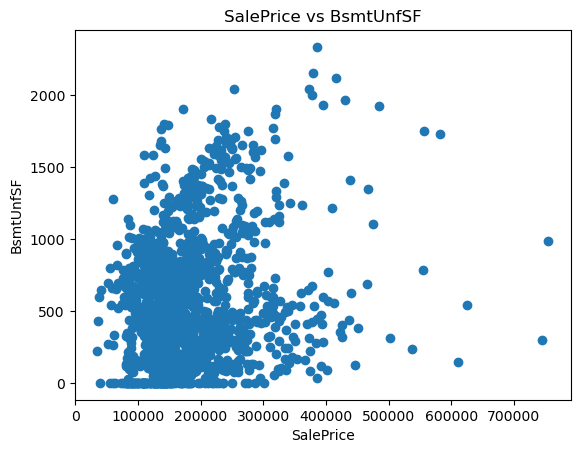

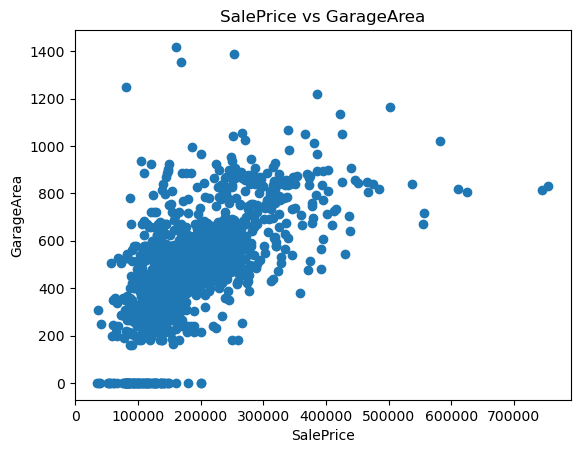

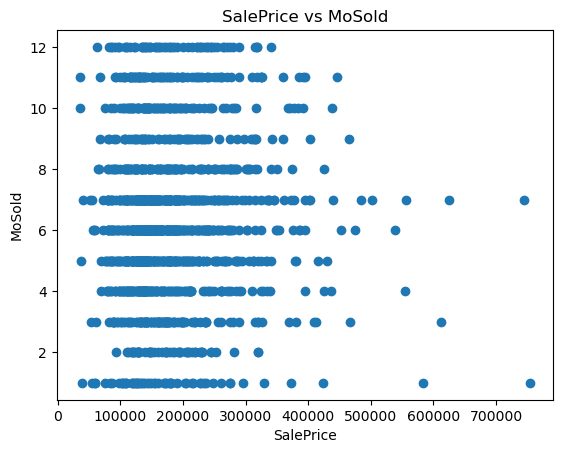

In [43]:
for col in df_ames[cols_to_remove].select_dtypes(include=['number']).columns:
    if col != 'SalePrice':
        plt.figure()
        plt.scatter(df_ames['SalePrice'], df_ames[col])
        plt.xlabel('SalePrice')
        plt.ylabel(col)
        plt.title(f'SalePrice vs {col}')
        plt.show()

### 1c. Elimiate the identified variables 

In [44]:
df_ames = df_ames.drop(columns=cols_to_remove)

### ??Include the features Corr > 0.5 

# 2. Data scaling and Pre-processing

#### 2a. Find if any of the columns have missing values

In [45]:
df_ames.isna().sum().sort_values(ascending = False)

PoolQC           1453
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageType         81
BsmtCond           37
MasVnrArea          8
Electrical          1
Id                  0
Fireplaces          0
PavedDrive          0
Functional          0
TotRmsAbvGrd        0
KitchenAbvGr        0
GarageCars          0
OpenPorchSF         0
WoodDeckSF          0
HalfBath            0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
YrSold              0
SaleType            0
SaleCondition       0
BedroomAbvGr        0
BsmtFullBath        0
FullBath            0
ExterCond           0
LotArea             0
LotConfig           0
Condition1          0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
Exterior1st         0
ExterQual           0
Foundation          0
BsmtHalfBath        0
BsmtFinSF1          0
TotalBsmtS

In [46]:
#Get the the columns with nulls
df_summary = pd.DataFrame({
    "column_name": df_ames.columns,
    "null_count": df_ames.isna().sum(),
    "data_type": df_ames.dtypes
}).reset_index(drop=True)
df_summary

,column_name,null_count,data_type
0,Id,0,int64
1,LotFrontage,259,float64
2,LotArea,0,int64
3,Alley,1369,object
4,LotConfig,0,object
5,Condition1,0,object
6,HouseStyle,0,object
7,OverallQual,0,int64
8,OverallCond,0,int64
9,YearBuilt,0,int64


#### Handle the numerical columns null vlaues, with mean

In [47]:
df_summary_num = df_summary[(df_summary["null_count"] > 0)  & (df_summary["data_type"] != 'object')]
df_summary_num

,column_name,null_count,data_type
1,LotFrontage,259,float64
12,MasVnrArea,8,float64
38,GarageYrBlt,81,float64


#### Adjust NA values with mean for the numericals


In [48]:
cols = df_summary_num["column_name"].tolist()
cols

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [49]:
df_ames[cols] = df_ames[cols].apply(lambda x: x.fillna(x.mean()))
df_ames[cols].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

#### Check for duplicate rows


In [50]:
num_duplicates = df_ames.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


#### Features scaling


In [51]:
 df_ames[['1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt']].describe()

,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,5.844521,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164
std,386.587738,436.528436,48.623081,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000
25%,882.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000
50%,1087.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164
75%,1391.250000,728.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000
max,4692.000000,2065.000000,572.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000


In [52]:
df_ames.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,103.685262,443.639726,1057.429452,1162.626712,...,1.767123,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,421.610009,22.024023,9981.264932,1.382997,1.112799,30.202904,180.569112,456.098091,438.705324,386.587738,...,0.747315,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,365.750000,60.000000,7553.500000,5.000000,5.000000,1954.000000,0.000000,0.000000,795.750000,882.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,730.500000,70.049958,9478.500000,6.000000,5.000000,1973.000000,0.000000,383.500000,991.500000,1087.000000,...,2.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,7.000000,6.000000,2000.000000,164.250000,712.250000,1298.250000,1391.250000,...,2.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,6110.000000,4692.000000,...,4.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


#### Features - Scalar fit, feature with different ranges 

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Columns to scale
cols_to_scale = ['LotFrontage', 'LotArea']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform all columns at once
df_ames[cols_to_scale] = scaler.fit_transform(df_ames[cols_to_scale])

#### Features - Robust fit, feature with different ranges and outliers

In [54]:
# Columns to scale
cols_to_scale = ['MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','PoolArea']

# Initialize scaler
scaler = RobustScaler()

# Fit and transform all columns at once
df_ames[cols_to_scale] = scaler.fit_transform(df_ames[cols_to_scale])

In [55]:
df_ames.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1.460000e+03,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,4.075887e-16,-5.840077e-17,6.099315,5.575342,1971.267808,0.631265,0.084436,0.131203,0.148506,...,1.767123,0.560979,0.318533,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,421.610009,1.000343e+00,1.000343e+00,1.382997,1.112799,30.202904,1.099355,0.640362,0.873045,0.759132,...,0.747315,0.746064,0.974353,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,1.000000,-2.227875e+00,-9.237292e-01,1.000000,1.000000,1872.000000,0.000000,-0.538435,-1.973134,-1.478645,...,0.000000,0.000000,-0.367647,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,365.750000,-4.564744e-01,-2.969908e-01,5.000000,5.000000,1954.000000,0.000000,-0.538435,-0.389552,-0.402553,...,1.000000,0.000000,-0.367647,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,730.500000,6.454645e-16,-1.040633e-01,6.000000,5.000000,1973.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1095.250000,4.065156e-01,1.087080e-01,7.000000,6.000000,2000.000000,1.000000,0.461565,0.610448,0.597447,...,2.000000,1.000000,0.632353,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,1460.000000,1.103492e+01,2.051827e+01,10.000000,9.000000,2010.000000,9.741248,7.385749,10.186070,7.079038,...,4.000000,5.101190,7.676471,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


### 2c. variable PoolArea convert to a binary
##### Only few houses has the Pool, scaling would effect the actual values hence add a new binary column 
##### drop the 'PoolArea'

In [56]:
df_ames["HasPool"] = (df_ames['PoolArea'] > 0).astype(int)
df_ames.drop(columns='PoolArea')
df_ames[df_ames["HasPool"] == 1].head()

,Id,LotFrontage,LotArea,Alley,LotConfig,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,HasPool
197,198,4.721465,1.493526,NaN,Corner,Artery,2Story,8,4,1918,...,0,512.0,Ex,GdPrv,0,2006,WD,Abnorml,235000,1
810,811,0.361095,-0.037766,NaN,Inside,Norm,1Story,6,6,1974,...,0,648.0,Fa,GdPrv,0,2006,WD,Normal,181000,1
1170,1171,0.270254,-0.063824,NaN,Inside,Norm,SLvl,6,6,1977,...,0,576.0,Gd,GdPrv,0,2008,WD,Normal,171000,1
1182,1183,4.085578,0.511751,NaN,Corner,Norm,2Story,10,5,1996,...,0,555.0,Ex,MnPrv,0,2007,WD,Abnorml,745000,1
1298,1299,11.034918,5.348867,NaN,Corner,Feedr,2Story,10,5,2008,...,0,480.0,Gd,NaN,0,2008,New,Partial,160000,1


In [57]:
#df_ames['HasPool'] = (df_ames['PoolArea'] > 0).astype(int)
# Lot area, MasVnrArea,BSmtFinSF1,TotalBsmtSF,1srFlrSF,MiscVal has Max values is very much deviated , treat it as a outlier
#LotFrontage - Standard Scalar
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#no scaling : year columns, garage cars,'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt'
#cols_scalar = ['LotFrontage','LotArea']
#outliers
#colstoscaleRobustsclar

#colstoScale_robust = ['MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','PoolArea']
# Example: scale Age (normal) and Income (skewed)
# scaler = StandardScaler()
# df_ames['LotFrontage'] = scaler.fit_transform(df_ames[['LotFrontage']])
# df_ames['LotFrontage'].head()
#scaler_income = RobustScaler()
#f['Income_scaled'] = scaler_income.fit_transform(df[['Income']])

# Handle the Categorical columns null vlaues

In [58]:
# Categorical columns
df_summary_cat = df_summary[(df_summary["null_count"] > 0)  & (df_summary["data_type"] == 'object')]
df_summary_cat


,column_name,null_count,data_type
3,Alley,1369,object
11,MasVnrType,872,object
16,BsmtCond,37,object
22,Electrical,1,object
36,FireplaceQu,690,object
37,GarageType,81,object
47,PoolQC,1453,object
48,Fence,1179,object


In [59]:
cols1 = df_summary_cat["column_name"].tolist()
cols1

['Alley',
 'MasVnrType',
 'BsmtCond',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'PoolQC',
 'Fence']

#### Check percentage of null values

In [60]:
(df_ames[cols1].isnull().mean() * 100).sort_values(ascending=False)

PoolQC         99.520548
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
FireplaceQu    47.260274
GarageType      5.547945
BsmtCond        2.534247
Electrical      0.068493
dtype: float64

In [61]:
# Check unique values
cat_unique_df = pd.DataFrame({
    "column": cols1,
    "unique_values": [df_ames[col].unique() for col in cols1],
    "n_unique": [df_ames[col].nunique() for col in cols1]
})
cat_unique_df

,column,unique_values,n_unique
0,Alley,"[nan, Grvl, Pave]",2
1,MasVnrType,"[BrkFace, nan, Stone, BrkCmn]",3
2,BsmtCond,"[TA, Gd, nan, Fa, Po]",4
3,Electrical,"[SBrkr, FuseF, FuseA, FuseP, Mix, nan]",5
4,FireplaceQu,"[nan, TA, Gd, Fa, Ex, Po]",5
5,GarageType,"[Attchd, Detchd, BuiltIn, CarPort, nan, Basmen...",6
6,PoolQC,"[nan, Ex, Fa, Gd]",3
7,Fence,"[nan, MnPrv, GdWo, GdPrv, MnWw]",4


#### Replace with Missing for NA

In [62]:
for col in cols1:
    df_ames[col] = df_ames[col].fillna('Missing')
(df_ames[cols1].isnull().mean() * 100).sort_values(ascending=False)

Alley          0.0
MasVnrType     0.0
BsmtCond       0.0
Electrical     0.0
FireplaceQu    0.0
GarageType     0.0
PoolQC         0.0
Fence          0.0
dtype: float64

#### Onehot encoding

In [63]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first',sparse_output=False)

encoded = encoder.fit_transform(df_ames[cols1])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

encoded_df

,Alley_Missing,Alley_Pave,MasVnrType_BrkFace,MasVnrType_Missing,MasVnrType_Stone,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Po,BsmtCond_TA,Electrical_FuseF,...,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,PoolQC_Fa,PoolQC_Gd,PoolQC_Missing,Fence_GdWo,Fence_Missing,Fence_MnPrv,Fence_MnWw
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1456,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1457,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1458,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


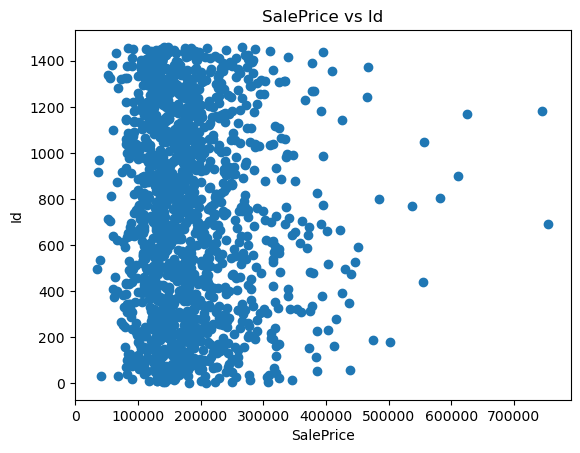

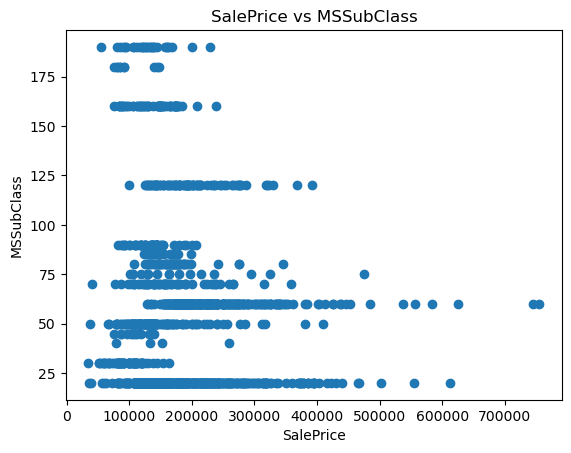

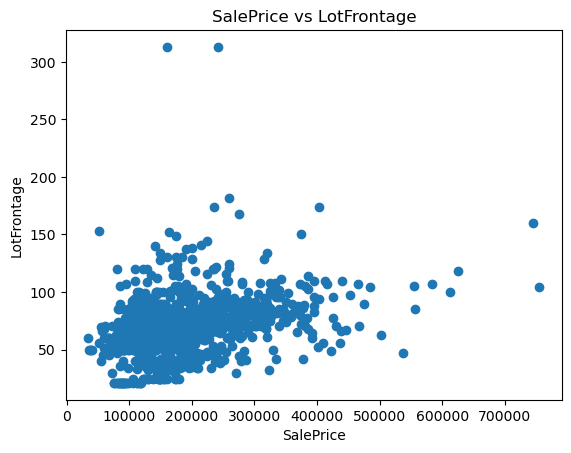

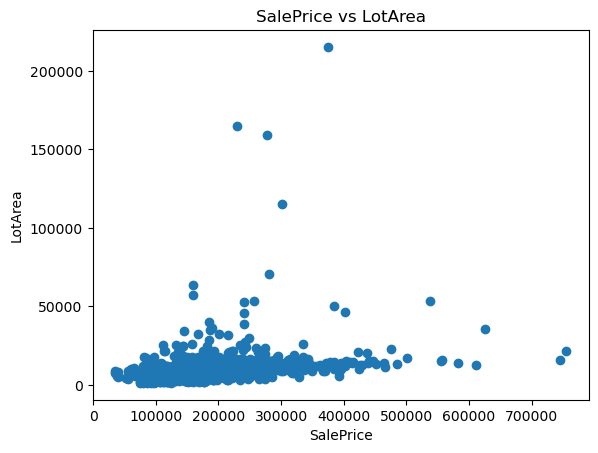

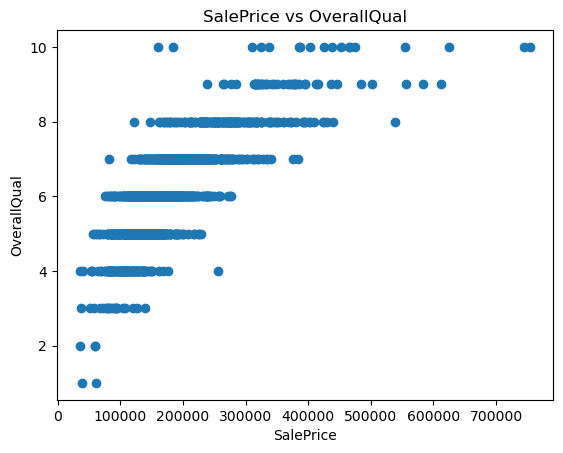

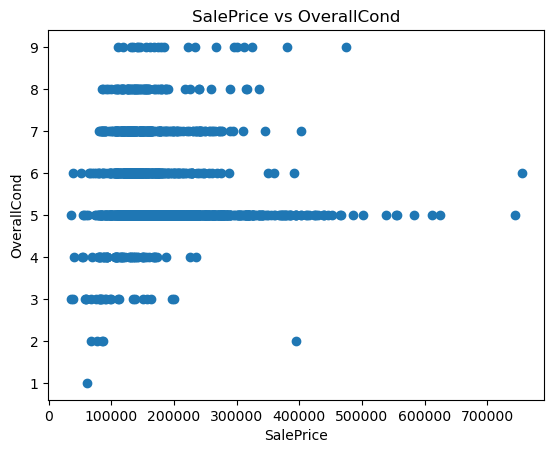

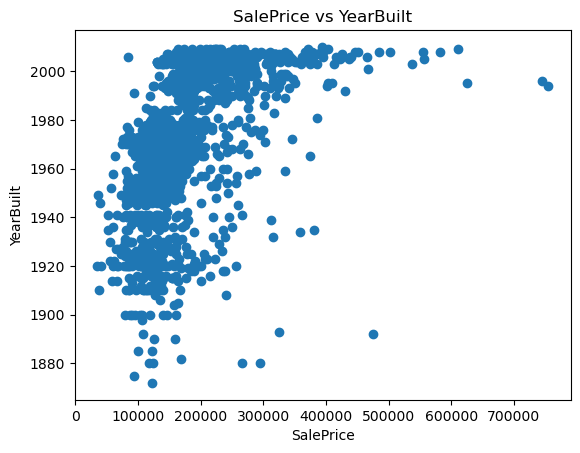

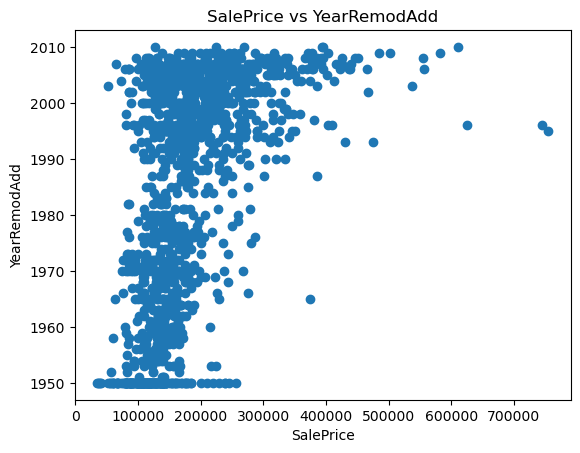

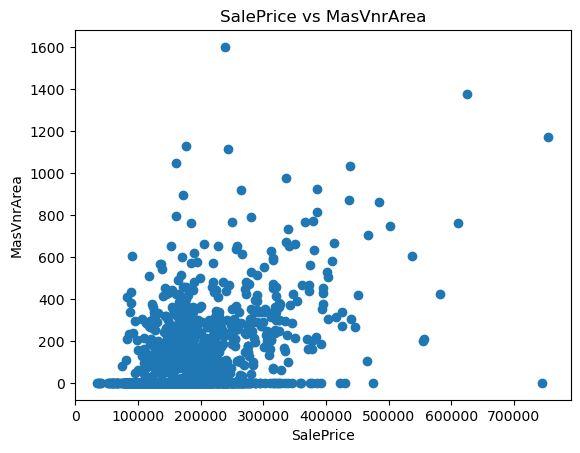

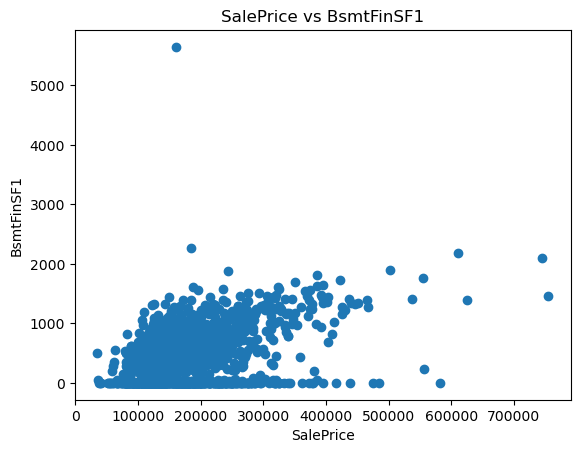

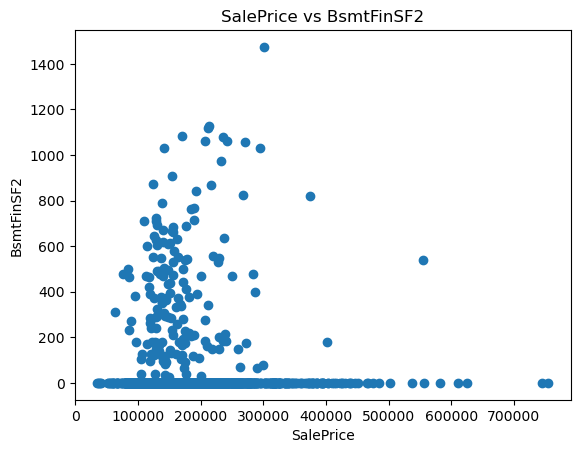

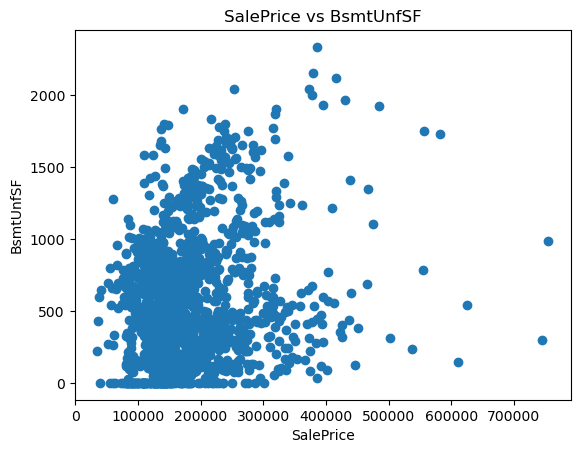

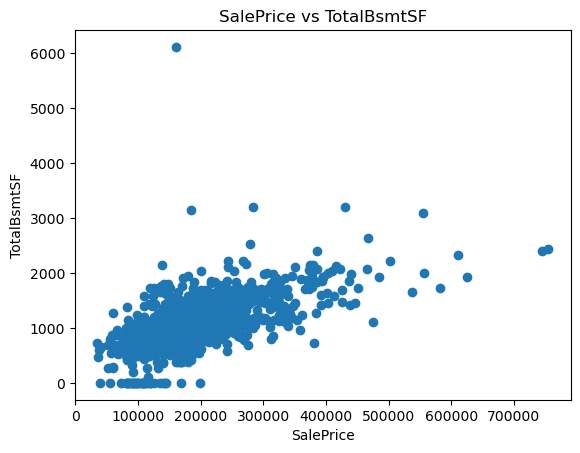

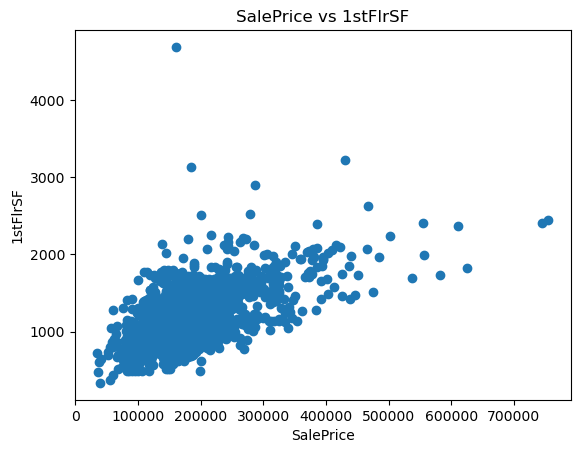

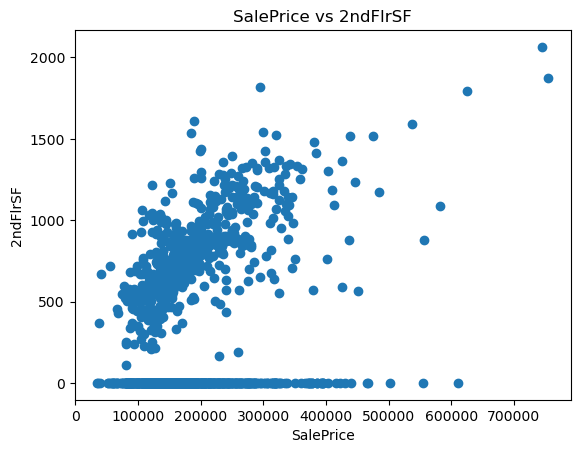

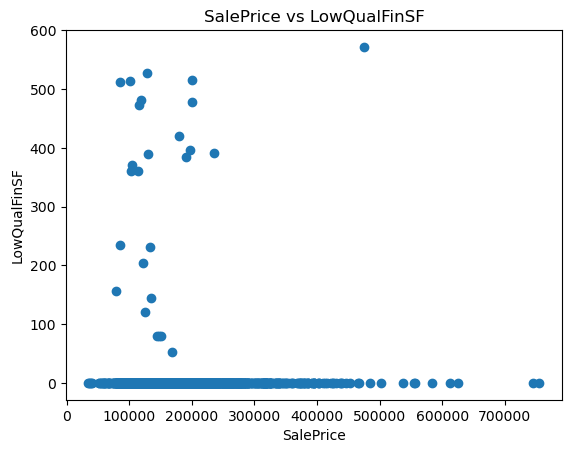

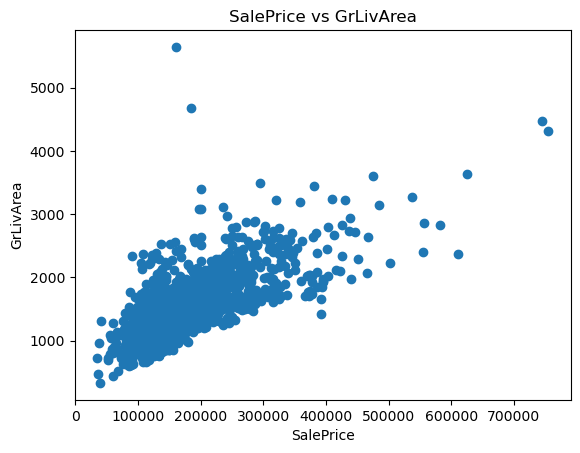

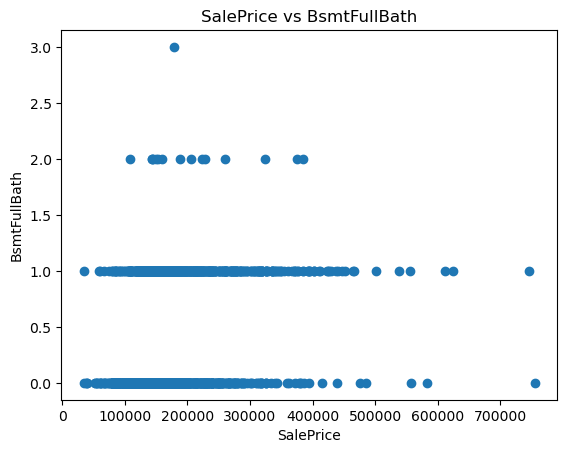

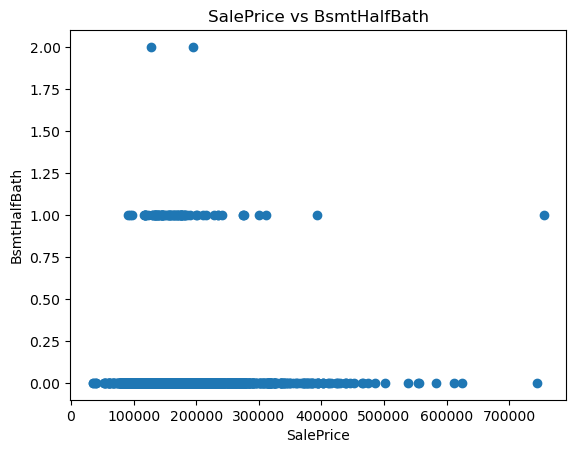

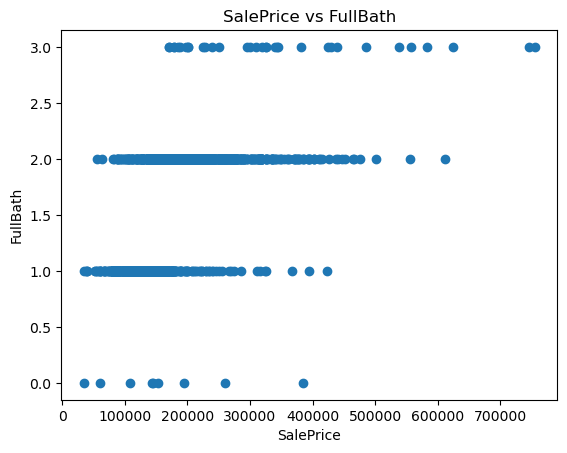

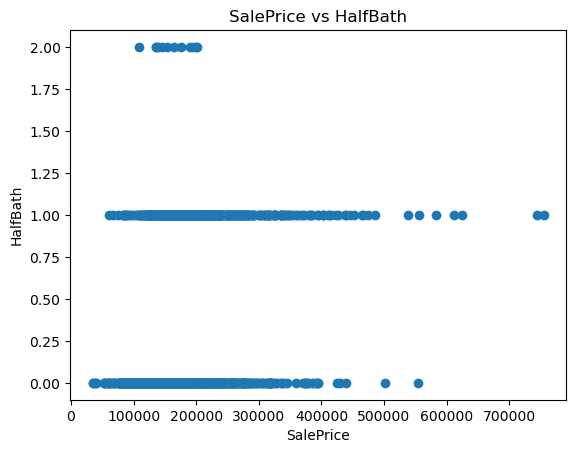

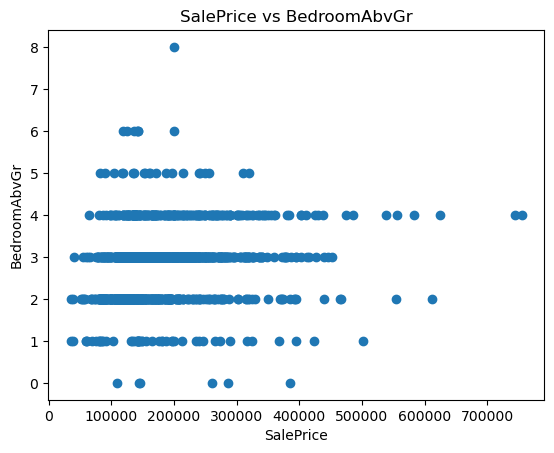

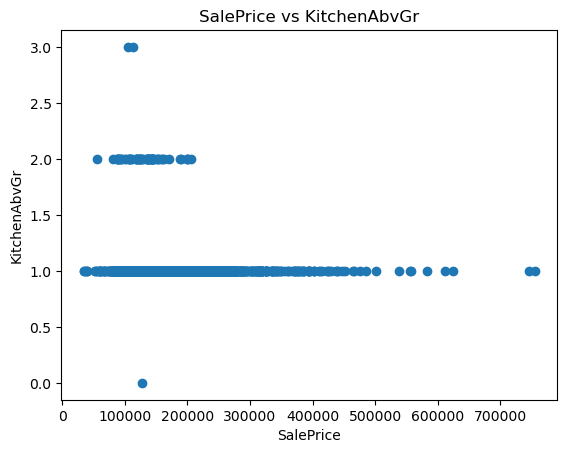

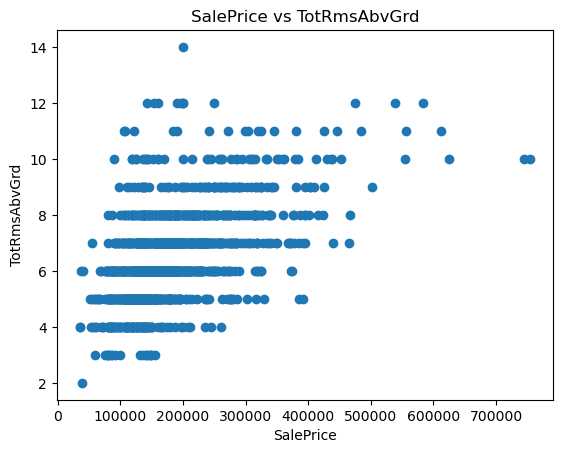

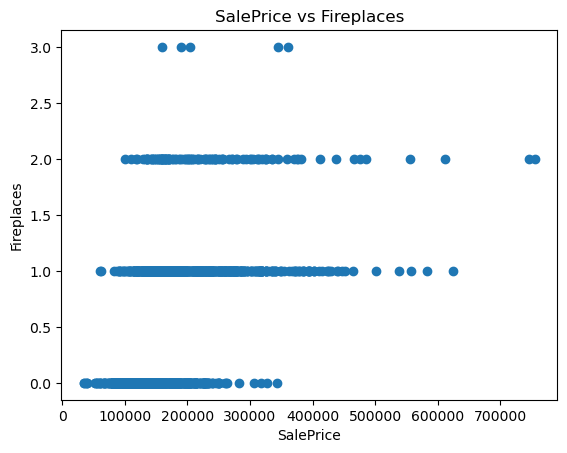

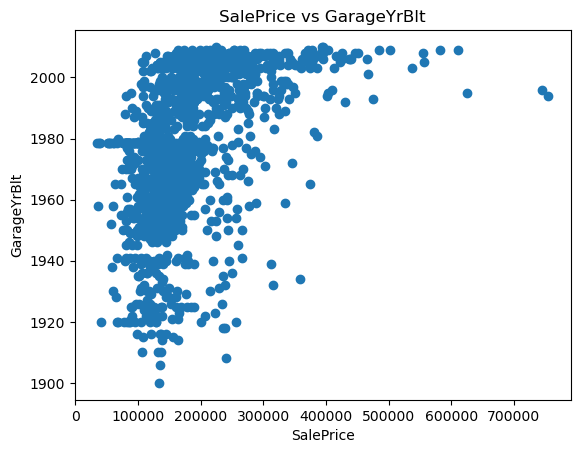

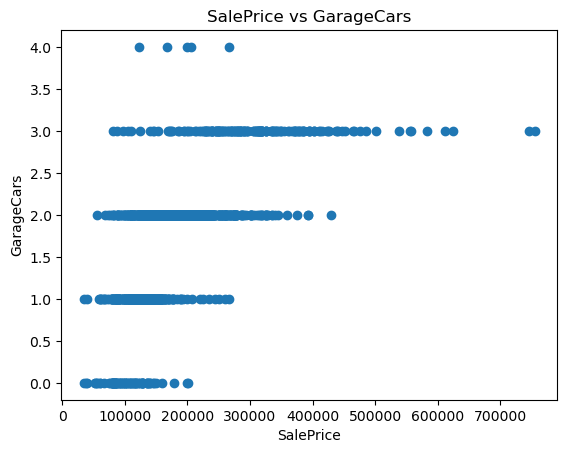

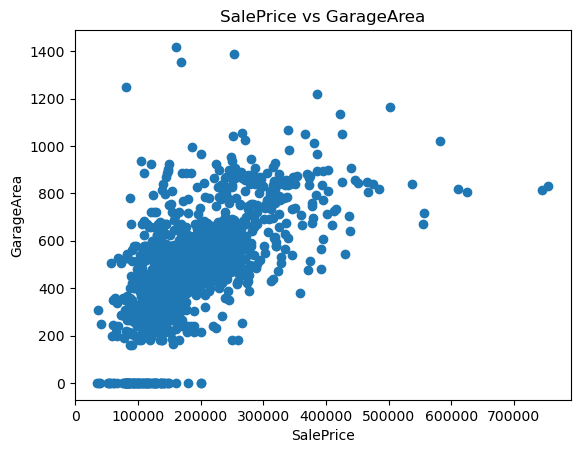

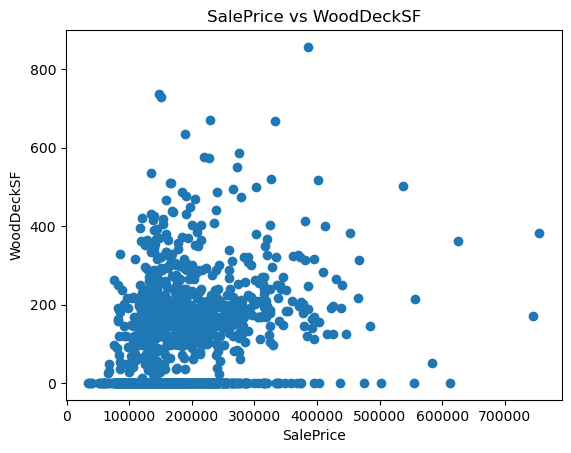

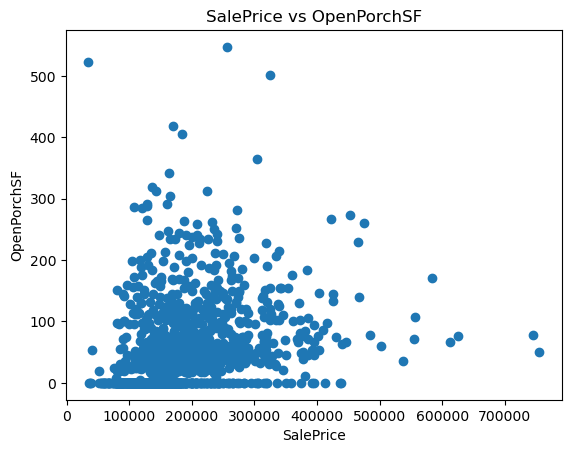

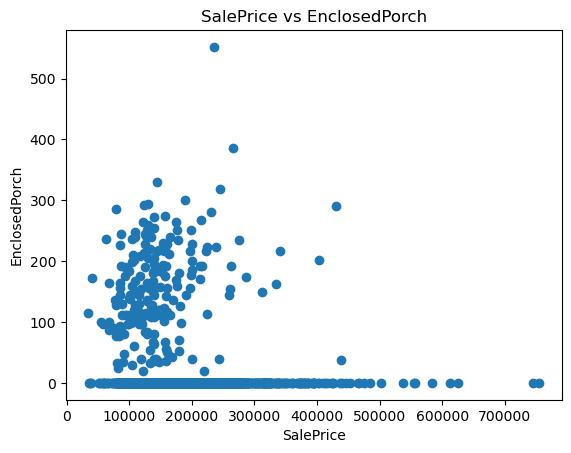

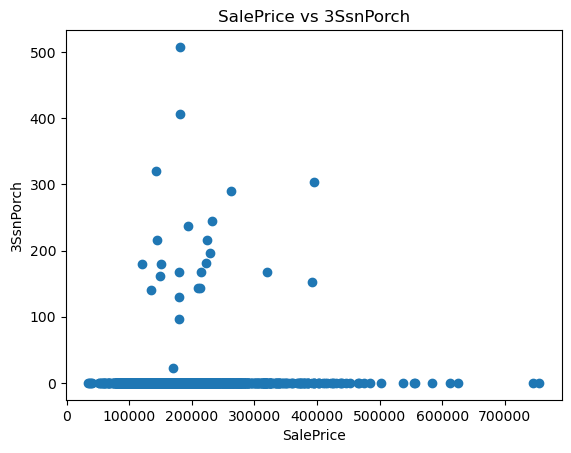

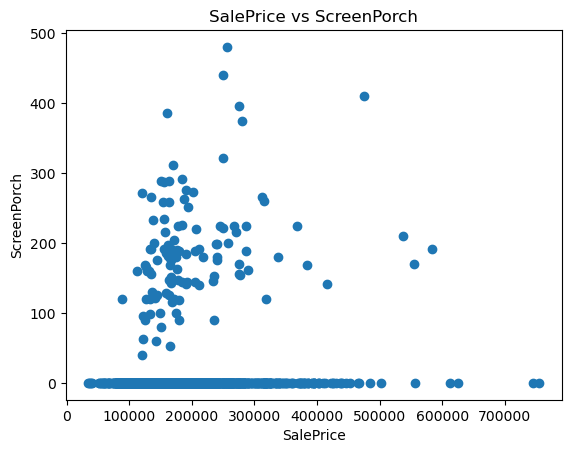

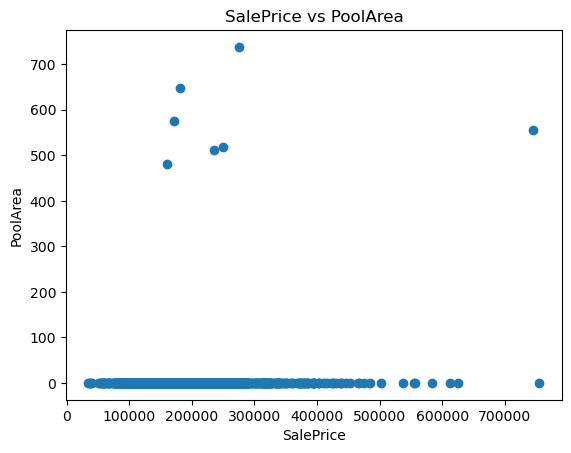

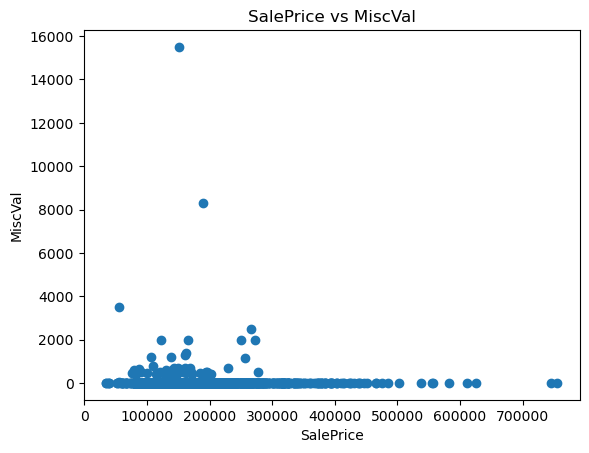

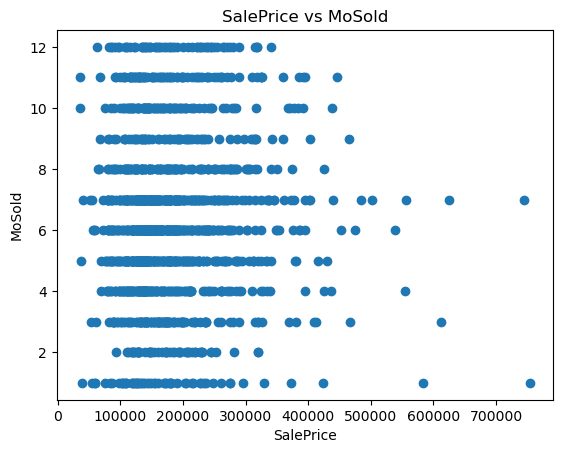

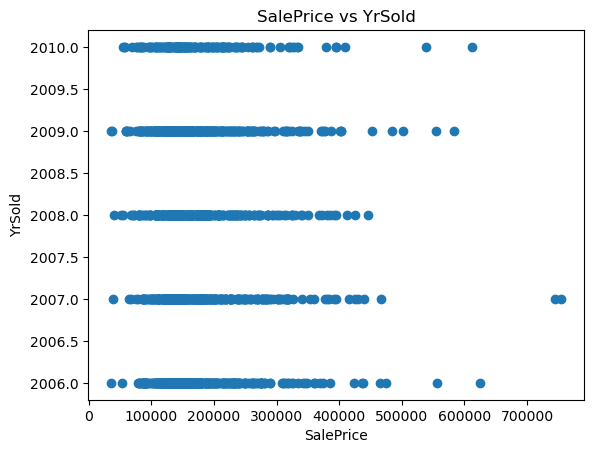

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

cols

for col in df_ames.select_dtypes(include=['number']).columns:
    if col != 'SalePrice':
        plt.figure()
        plt.scatter(df_ames['SalePrice'], df_ames[col])
        plt.xlabel('SalePrice')
        plt.ylabel(col)
        plt.title(f'SalePrice vs {col}')
        plt.show()
